<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1__Semana_6_A1Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Curso Herramientas para la simulacion de Sistemas Dinamicos**

**Actividades Semana 6**

**Lenguaje Julia**  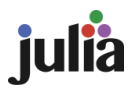
https://julialang.org/

In [ ]:
versioninfo() #setear a Runtime en Julia  https://julialang.org/learning/

Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × AMD EPYC 7B12
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, znver2)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto


In [ ]:
# @title

using Plots

In [ ]:
# @title

using Pkg;


In [ ]:
# @title

Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.4.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
# @title
# Instala el kernel de Julia y librerías (ejecutar una vez por sesión)
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("GR") # GR es un backend rápido para Plots
Pkg.add("SpecialFunctions")
import Pkg
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [28b8d3ca] + GR v0.73.16
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [276daf66] + SpecialFunctions v2.5.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed AssetRegistry ───────── v0.1.0
   Installed Blink ───────────────── v0.12.9
   Installed WebIO ───────────────── v0.8.21
   Installed Pidfile ─────────────── v1.3.0
   Installed WebSockets ──────────── v1.6.0
   Installed PlotlyBase ──────────── v0.8.21
   Installed Hiccup ────────────

**Ejercicio 1. Sistema RLC**

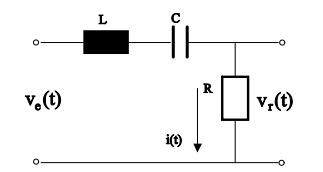

Fig. 5-1. Esquemático del circuito RLC.

Sea el sistema eléctrico de la Fig. 5-1, se requiere obtener la evolución temporal de la corriente para
diferentes tensiones de entrada.

Para el caso de asignarle valores unitarios a Ve, R, L y C, con entra entrada Heaviside unitaria se obtuvo la solución analítica como

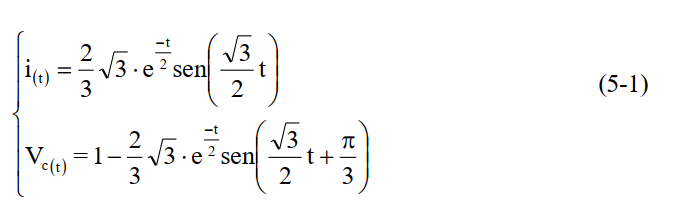

Expresión matricial

Para determinar la evolución de la corriente del circuito se pueden plantear las ecuaciones diferenciales del mismo como,

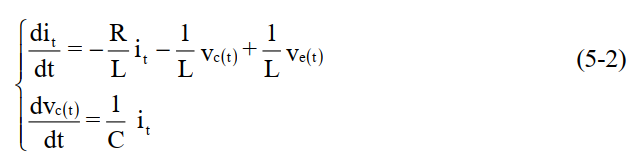

Las Ec. (5-2) se pueden expresar en una ecuación matricial-vectorial con las representaciones en variables de estado definiendo a i, vc como variables de estado y a x como vector de estado, es decir x=[ i vc]T se convierte en

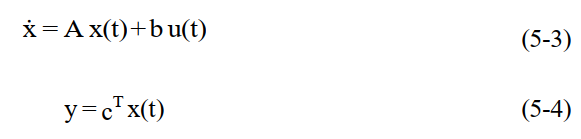

donde las matrices contienen a los coeficientes del circuito,

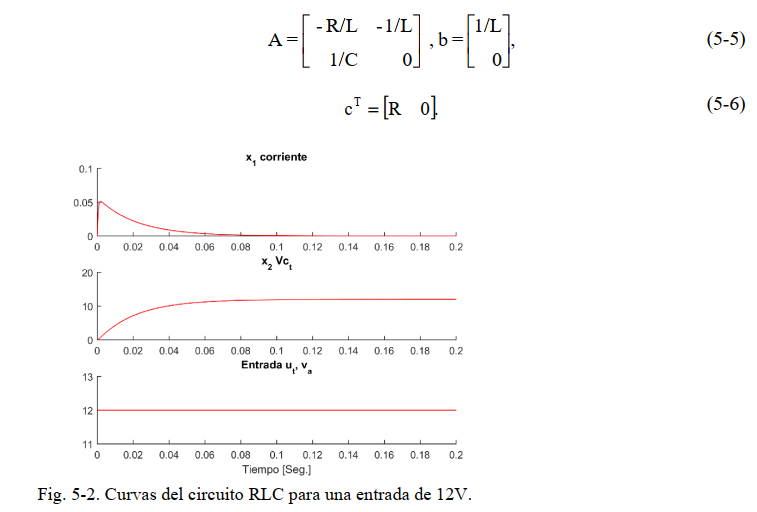

Nótese que las ecuaciones (5-1) son la solución al sistema para coeficientes específicos, en este caso, de valor unitario.

**Actividades.**




2- Asignar valores a R=2,2e3 Ohm, L=10 e-6 Hy, y C=100e-9 F. Obtener simulaciones que permitan
estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V.

In [ ]:
# @title
# Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
# Silvia Miró
# Modulo 1 - Semana 1
# Actividad 3 (Adaptación del código original de Python con solución analítica)

# Celda 1: Instalación y Carga de Paquetes (Ejecutar una vez por sesión de Colab/Jupyter)
# Para correr en un entorno interactivo como Colab, descomentar y ejecutar:
# using Pkg
# Pkg.add("IJulia")      # Para el kernel de Julia en Colab/Jupyter
# Pkg.add("Plots")       # Librería principal para graficar
# Pkg.add("GR")          # Backend rápido para Plots
# Pkg.add("LinearAlgebra") # Para funciones como `*` (multiplicación matriz-vector)

# Celda 2: Simulación del Circuito RLC y Comparación con Solución Analítica en Julia

using Plots        # Para graficar
using LinearAlgebra # Para operaciones con matrices/vectores

# ========== PARÁMETROS DE SIMULACIÓN ==========
h = 1e-9           # Paso de tiempo (1 ns)
t_simul = 1e-3     # Tiempo de simulación (1 ms)  <-- OJO: Este es 1ms, no 10µs como el comentario de Python.
R = 2.2e3          # Resistencia (2.2 kΩ)
L = 10e-6          # Inductancia (10 µH)
C = 100e-9         # Capacitancia (100 nF)

# ========== SOLUCIÓN NUMÉRICA (Método de Euler) ==========
# Matrices del sistema en espacio de estados
# dx/dt = Ax + Bu
# x = [i_L; V_C]
# di_L/dt = (-R/L)*i_L - (1/L)*V_C + (1/L)*Va
# dV_C/dt = (1/C)*i_L + 0*V_C + 0*Va
A = [ -R/L  -1/L;
     1/C     0.0 ] # 0.0 para asegurar tipo Float64
B = [1/L; 0.0] # Es un vector columna. 0.0 para asegurar tipo Float64

# Inicialización de vectores para almacenar resultados
num_points = Int(t_simul / h) # Número total de puntos de tiempo

x1_num = zeros(Float64, num_points)  # Corriente i(t)
x2_num = zeros(Float64, num_points)  # Tensión v(t) (voltaje en el capacitor)
u_num = zeros(Float64, num_points)   # Entrada Va(t)
t_vec = zeros(Float64, num_points)   # Vector de tiempo

x_state = [0.0, 0.0]     # Condiciones iniciales [i(0)=0, v(0)=0]
Va_current = 0.0         # Voltaje inicial Va(0)=0 antes del escalón

# Bucle de integración de Euler
for ii in 0:(num_points - 1) # Julia permite bucles de 0:N-1 como Python `range(N)`

    # Calcula la derivada del estado (xp) usando el Va_current del paso actual
    xp = A * x_state + B * Va_current # Multiplicación de matriz-vector

    # Integración Euler
    x_state[1] = x_state[1] + xp[1] * h
    x_state[2] = x_state[2] + xp[2] * h

    # Almacena Va(t) *antes* de cambiarlo para el siguiente paso (como en Python)
    u_num[ii+1] = Va_current

    # Aplica el escalón: Va pasa a 12V para los tiempos > 0
    Va_current = 12.0

    # Almacena i(t) y v(t)
    x1_num[ii+1] = x_state[1] # x_state[0,0] en Python es x_state[1] en Julia
    x2_num[ii+1] = x_state[2] # x_state[1,0] en Python es x_state[2] en Julia

    # Almacena tiempo
    t_vec[ii+1] = ii * h # Julia es 1-indexado, así que ii*h para el tiempo correcto en el punto ii+1
end


# ========== SOLUCIÓN ANALÍTICA (VALORES REALES OBTENIDOS DEL CÓDIGO DE PYTHON) ==========
# Estas constantes son las mismas que en el código de Python
const_i_exp1 = 0.00545477
exp1_rate_i = -4545.55
exp2_rate_i = -2.19995e8

const_v_exp1 = 12.0002
exp1_rate_v = -4545.55
const_v_exp2 = 0.000247949
exp2_rate_v = -2.19995e8


# Usamos t_vec para calcular la analítica
i_analitico = const_i_exp1 .* exp.(exp1_rate_i .* t_vec) .- const_i_exp1 .* exp.(exp2_rate_i .* t_vec)
v_analitico = 12.0 .+ const_v_exp2 .* exp.(exp2_rate_v .* t_vec) .- const_v_exp1 .* exp.(exp1_rate_v .* t_vec)


# ========== GRÁFICAS ==========
# Configuración del layout para los subplots
p_i = plot(t_vec, x1_num,
           label="Numérica", # Etiqueta más corta
           title="Corriente i(t) en Circuito RLC (Sobreamortiguado)",
           xlabel="Tiempo (s)", ylabel="i(t) (A)", # <--- Sin $
           color=:blue, linewidth=1.5, legend=:topright, grid=true)

plot!(p_i, t_vec, i_analitico,
      label="Analítica",
      color=:red, linestyle=:dash, linewidth=1.5) # <--- Corregido a :dash

p_v = plot(t_vec, x2_num,
           label="Numérica", # Etiqueta más corta
           title="Tensión v(t) (Voltaje en Capacitor)",
           xlabel="Tiempo (s)", ylabel="v(t) (V)", # <--- Sin $
           color=:blue, linewidth=1.5, legend=:bottomright, grid=true)

plot!(p_v, t_vec, v_analitico,
      label="Analítica",
      color=:red, linestyle=:dash, linewidth=1.5) # <--- Corregido a :dash

p_u = plot(t_vec, u_num,
           label="Escalón de 12V",
           title="Entrada de Voltaje Va(t)",
           xlabel="Tiempo (s)", ylabel="Va(t) (V)", # <--- Sin $
           color=:darkgreen, linewidth=1.5, legend=:topright, grid=true)

# Combinar todas las gráficas
plot(p_i, p_v, p_u, layout=(3,1), size=(800, 1000),
     plot_title="Comparación: Simulación Numérica vs. Analítica",
     titlefont = font(14), labelfont = font(10), legendfont = font(8),
     margin = 5Plots.mm # Añadir margen para evitar que los títulos se superpongan
)